# Gemma 3 - 12B - Evaluation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer

In [2]:
base_output_dir = r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\gemma3"
prompt_approaches = os.listdir(base_output_dir)

Processing liu_2023_few_shot_preprocessor...


Model Name: Gemma3, Task: aki, Dataset: eicu, Timestamp: 20250701_095525
Model Name: Gemma3, Task: aki, Dataset: hirid, Timestamp: 20250701_095525
Model Name: Gemma3, Task: aki, Dataset: miiv, Timestamp: 20250701_095525
Model Name: Gemma3, Task: mortality, Dataset: eicu, Timestamp: 20250701_095525
Model Name: Gemma3, Task: mortality, Dataset: hirid, Timestamp: 20250701_095525
Model Name: Gemma3, Task: mortality, Dataset: miiv, Timestamp: 20250701_095525
Model Name: Gemma3, Task: sepsis, Dataset: eicu, Timestamp: 20250701_095525
Model Name: Gemma3, Task: sepsis, Dataset: hirid, Timestamp: 20250701_095525
Model Name: Gemma3, Task: sepsis, Dataset: miiv, Timestamp: 20250701_095525
Preparing data for Gemma3 PULSE score calculation...
DATA VERIFICATION FOR PULSE SCORE
Model Type: LLM
✓ Required columns present: True
✓ Target Label is binary: True
✓ Predicted Diagnosis is binary: True
✓ Predicted Probability in [0,1]: True
✓ No invalid predictions detected

✅ Data format is correct for PULSE

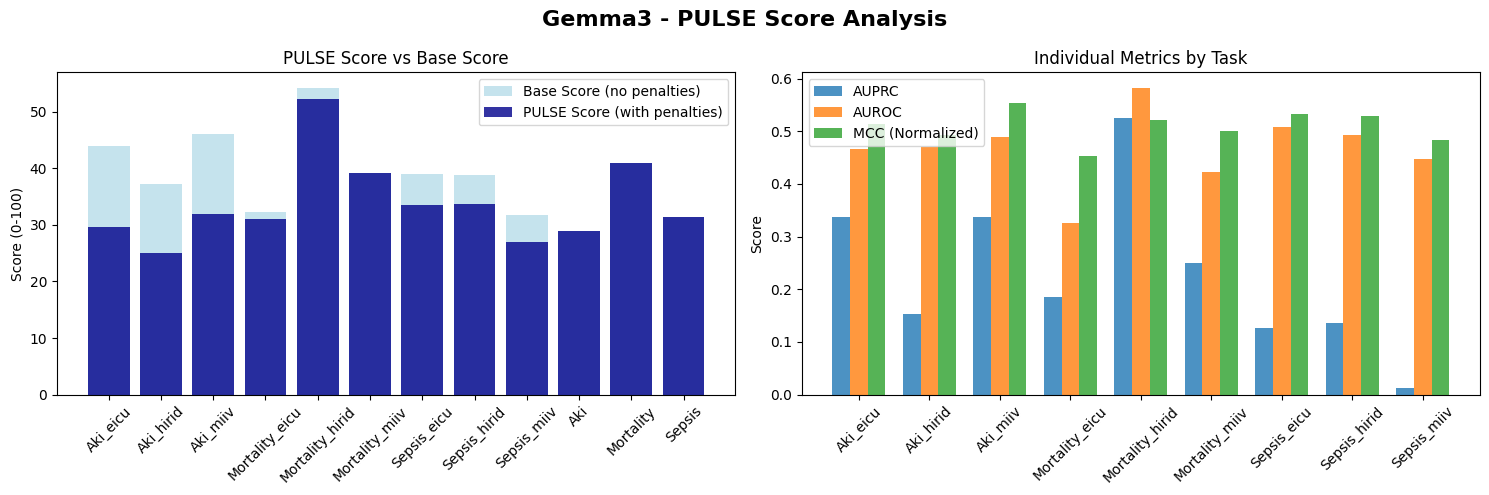

🔍 KEY INSIGHTS - PULSE SCORE ANALYSIS
🎯 FINAL PULSE SCORE: 33.73/100
📈 Performance Category: Poor performance

📊 AKI_EICU Analysis:
   • Base performance: 44.0/100
   • Final PULSE score: 29.6/100
   • Penalty impact: -14.4 points
   • Problematic predictions: 967 (inconsistent or invalid)

📊 AKI_HIRID Analysis:
   • Base performance: 37.3/100
   • Final PULSE score: 25.0/100
   • Penalty impact: -12.3 points
   • Problematic predictions: 948 (inconsistent or invalid)

📊 AKI_MIIV Analysis:
   • Base performance: 46.0/100
   • Final PULSE score: 32.0/100
   • Penalty impact: -14.0 points
   • Problematic predictions: 906 (inconsistent or invalid)

📊 MORTALITY_EICU Analysis:
   • Base performance: 32.3/100
   • Final PULSE score: 31.1/100
   • Penalty impact: -1.2 points
   • Problematic predictions: 16 (inconsistent or invalid)

📊 MORTALITY_HIRID Analysis:
   • Base performance: 54.3/100
   • Final PULSE score: 52.3/100
   • Penalty impact: -1.9 points
   • Problematic predictions: 13 (

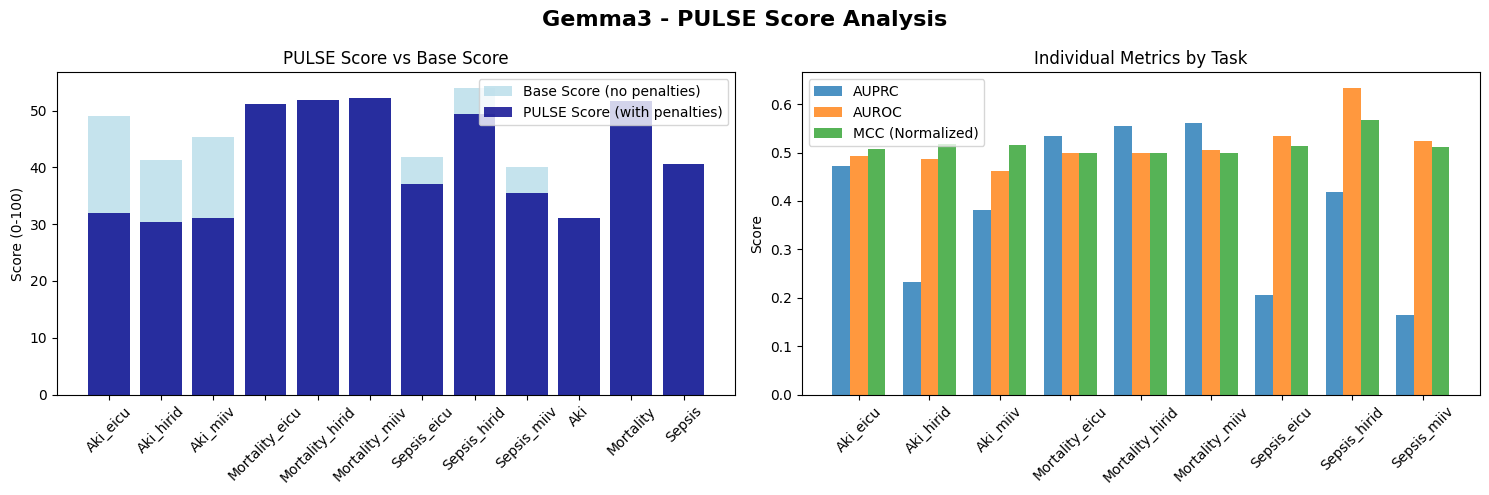

🔍 KEY INSIGHTS - PULSE SCORE ANALYSIS
🎯 FINAL PULSE SCORE: 41.16/100
📈 Performance Category: Moderate performance

📊 AKI_EICU Analysis:
   • Base performance: 49.1/100
   • Final PULSE score: 32.0/100
   • Penalty impact: -17.1 points
   • Problematic predictions: 868 (inconsistent or invalid)

📊 AKI_HIRID Analysis:
   • Base performance: 41.4/100
   • Final PULSE score: 30.4/100
   • Penalty impact: -11.0 points
   • Problematic predictions: 734 (inconsistent or invalid)

📊 AKI_MIIV Analysis:
   • Base performance: 45.3/100
   • Final PULSE score: 31.0/100
   • Penalty impact: -14.3 points
   • Problematic predictions: 791 (inconsistent or invalid)

📊 MORTALITY_EICU Analysis:
   • Base performance: 51.2/100
   • Final PULSE score: 51.2/100
   • Penalty impact: -0.0 points
   • Problematic predictions: 0 (inconsistent or invalid)

📊 MORTALITY_HIRID Analysis:
   • Base performance: 51.8/100
   • Final PULSE score: 51.8/100
   • Penalty impact: -0.0 points
   • Problematic predictions: 0

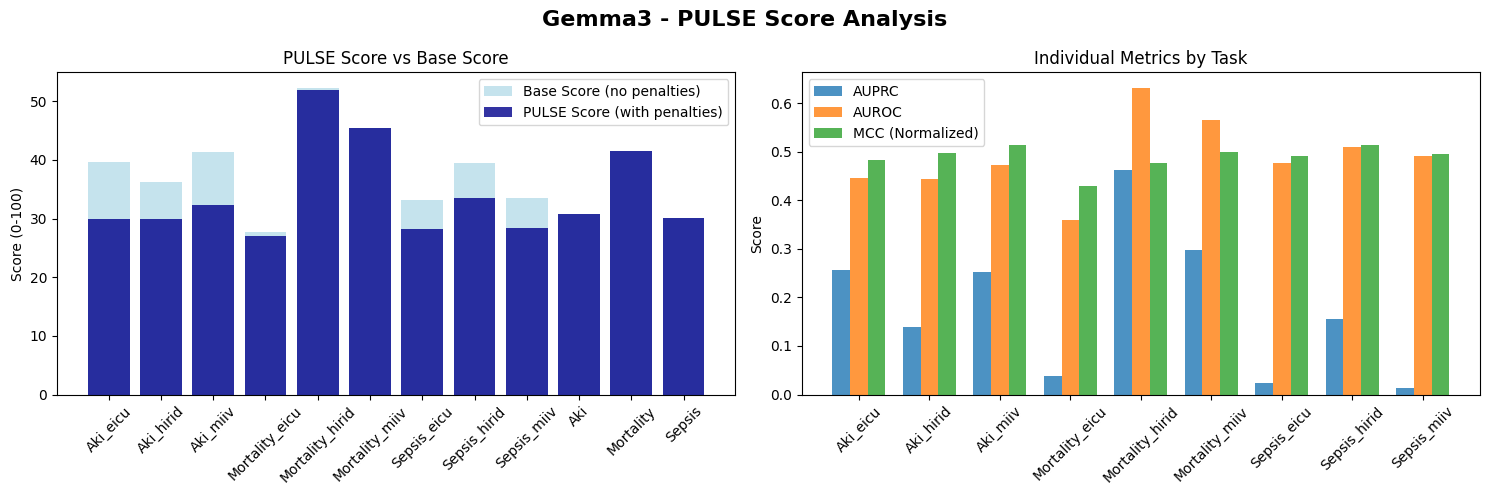

🔍 KEY INSIGHTS - PULSE SCORE ANALYSIS
🎯 FINAL PULSE SCORE: 34.08/100
📈 Performance Category: Poor performance

📊 AKI_EICU Analysis:
   • Base performance: 39.6/100
   • Final PULSE score: 30.0/100
   • Penalty impact: -9.6 points
   • Problematic predictions: 976 (inconsistent or invalid)

📊 AKI_HIRID Analysis:
   • Base performance: 36.2/100
   • Final PULSE score: 29.9/100
   • Penalty impact: -6.3 points
   • Problematic predictions: 947 (inconsistent or invalid)

📊 AKI_MIIV Analysis:
   • Base performance: 41.4/100
   • Final PULSE score: 32.4/100
   • Penalty impact: -9.0 points
   • Problematic predictions: 982 (inconsistent or invalid)

📊 MORTALITY_EICU Analysis:
   • Base performance: 27.7/100
   • Final PULSE score: 27.1/100
   • Penalty impact: -0.6 points
   • Problematic predictions: 12 (inconsistent or invalid)

📊 MORTALITY_HIRID Analysis:
   • Base performance: 52.3/100
   • Final PULSE score: 51.9/100
   • Penalty impact: -0.5 points
   • Problematic predictions: 6 (inco

In [3]:
from src.eval.pulse_score import PULSEScoreCalculator

best_prompt_approach = None
results_dict = {}

for prompt_approach in prompt_approaches:
    if not os.path.isdir(os.path.join(base_output_dir, prompt_approach)):
        continue
    print(f"Processing {prompt_approach}...")
    cat_files = LLMAnalyzer.categorize_files(
        [os.path.join(base_output_dir, prompt_approach)],
        verbose=False,
    )
    df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])
    if "Step Name" in df_mdata.columns:
        df_mdata = df_mdata[df_mdata["Step Name"] == "final_prediction"]

    ps = PULSEScoreCalculator()
    pulse_score = ps.calculate_pulse_score_from_raw_data(
        df=df_mdata,
    )
    pulse_score_temp = pulse_score["overall"]["pulse_score"]
    results_dict[prompt_approach] = pulse_score["overall"]

    if best_prompt_approach is None or pulse_score_temp > best_prompt_approach[1]:
        best_prompt_approach = (prompt_approach, pulse_score_temp)

print(
    f"Best prompt approach: {best_prompt_approach[0]} with PULSE score: {best_prompt_approach[1]}"
)

## Model Metrics

In [4]:
df_results = LLMAnalyzer.load_metrics_from_prompt_approaches(base_output_dir, prompt_approaches)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:865: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


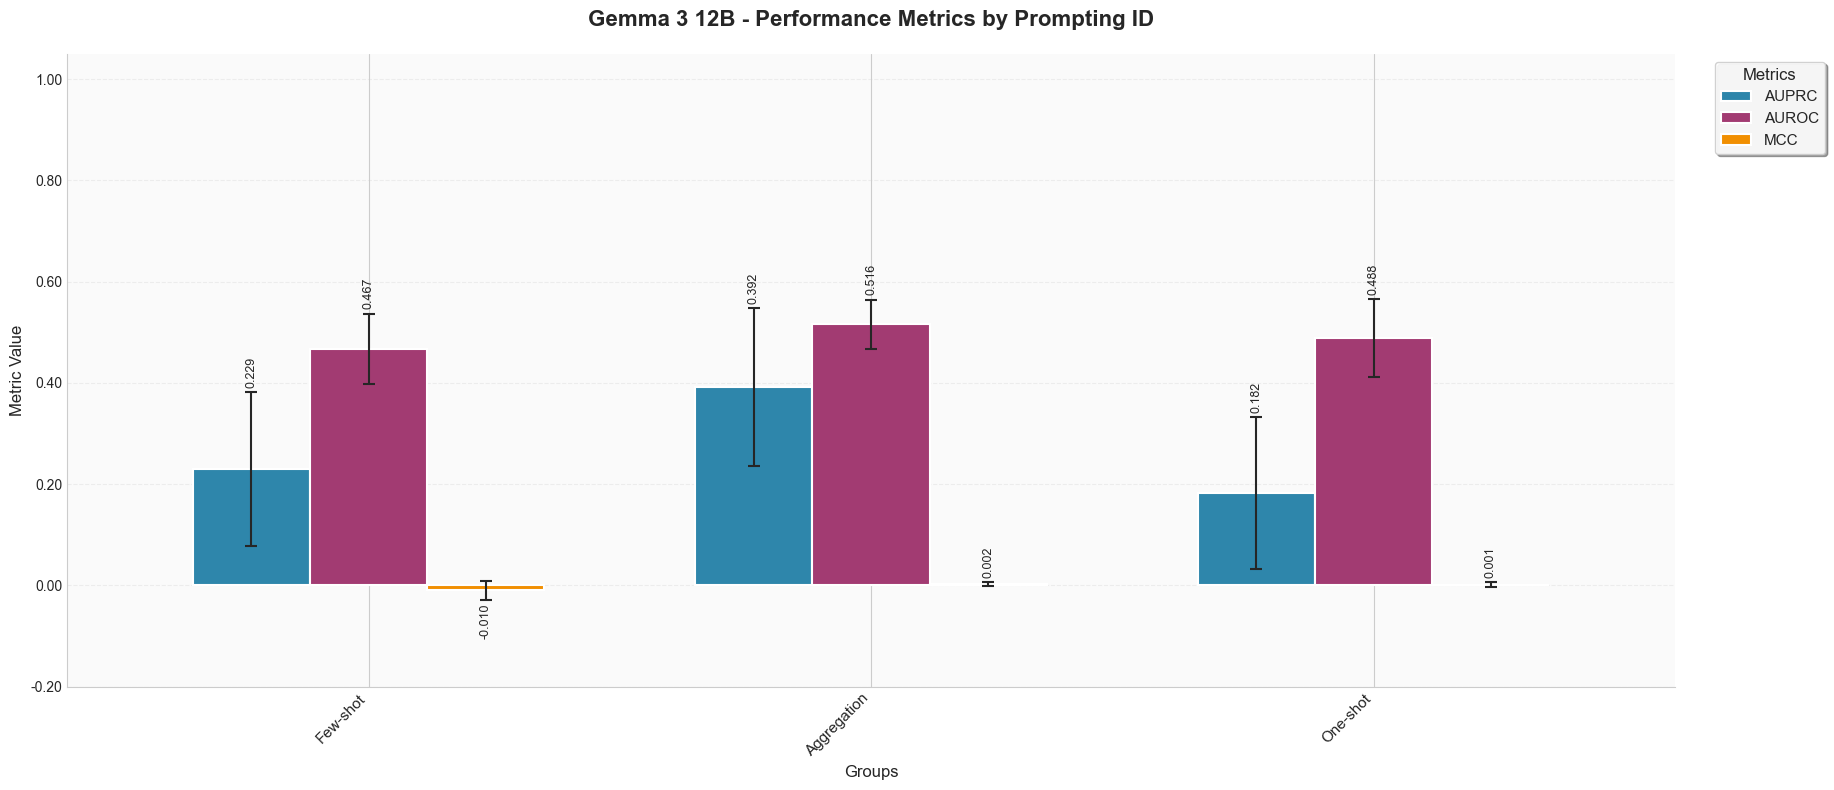

In [5]:
LLMAnalyzer.plot_metrics(
    df_results, group=["prompting_id"], title_prefix="Gemma 3 12B - ",
)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:865: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


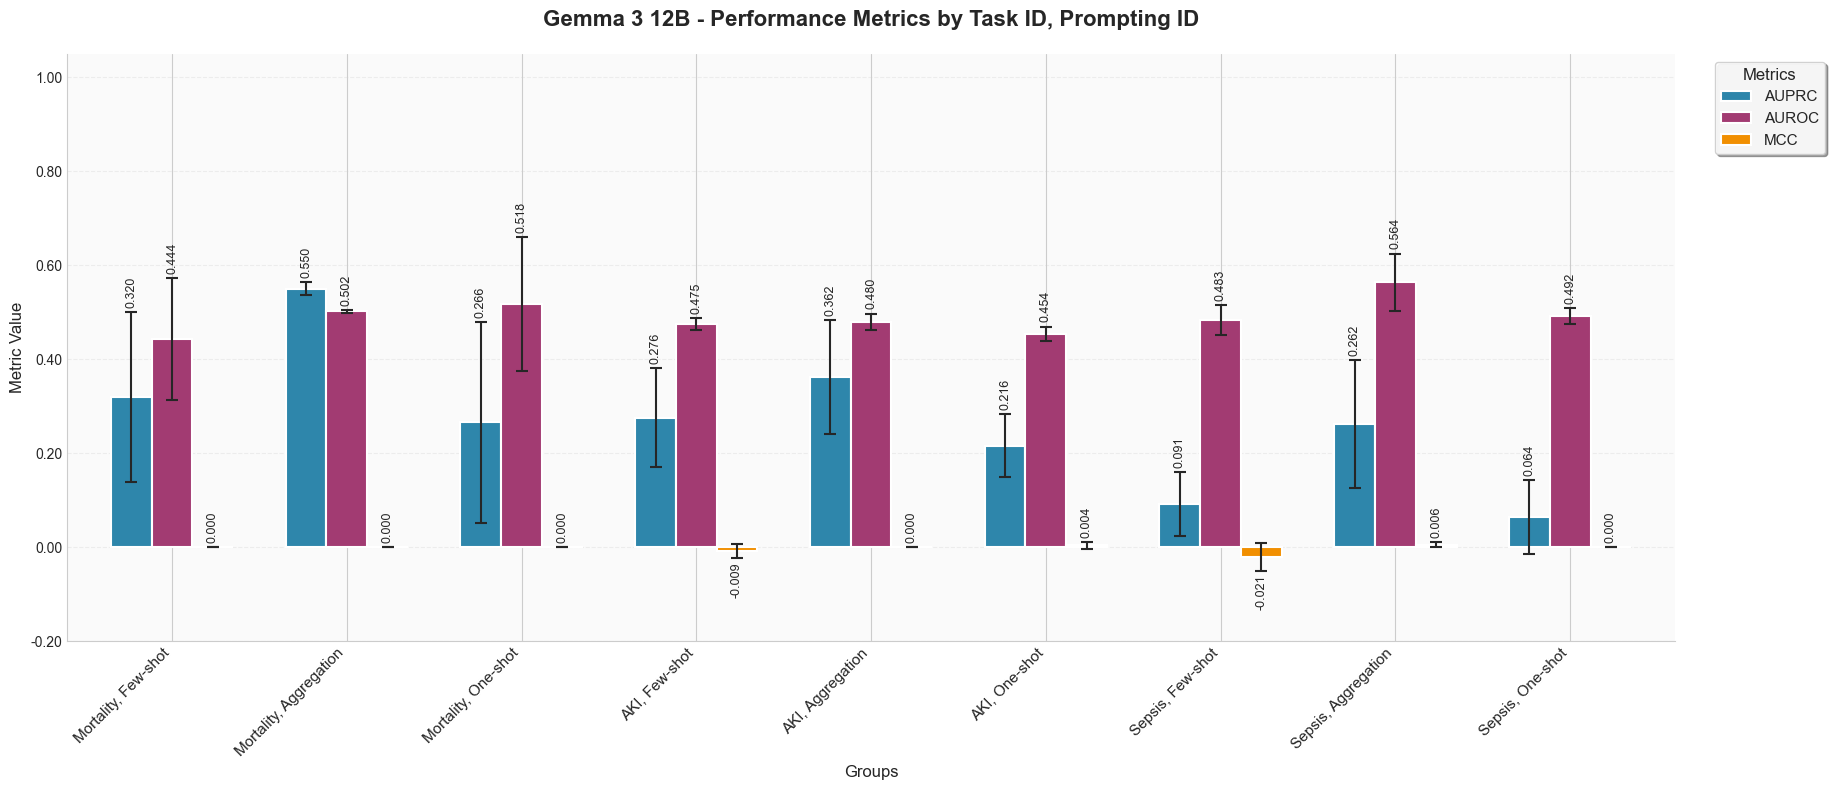

In [6]:
LLMAnalyzer.plot_metrics(
    df_results,
    group=["task_id", "prompting_id"],
    title_prefix="Gemma 3 12B - ",
)

In [7]:
import ipywidgets as widgets
from IPython.display import display

Analysis of best prompting approach

In [8]:
prompt_dropdown = widgets.Dropdown(
    options=prompt_approaches,
    value=best_prompt_approach[0],
    description='Prompt Approach:',
    style={'description_width': 'initial'}
)
display(prompt_dropdown)


Dropdown(description='Prompt Approach:', index=1, options=('liu_2023_few_shot_preprocessor', 'sarvari_2024_agg…

In [9]:
best_approach_path = os.path.join(
    base_output_dir, prompt_dropdown.value
)
print(f"Loading metadata from: {best_approach_path}")
print("======================================================")
cat_files = LLMAnalyzer.categorize_files([best_approach_path], verbose=False)
df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])

Loading metadata from: C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\gemma3\sarvari_2024_aggregation_preprocessor
Model Name: Gemma3, Task: aki, Dataset: eicu, Timestamp: 20250703_100254
Model Name: Gemma3, Task: aki, Dataset: hirid, Timestamp: 20250703_100254
Model Name: Gemma3, Task: aki, Dataset: miiv, Timestamp: 20250703_100254
Model Name: Gemma3, Task: mortality, Dataset: eicu, Timestamp: 20250703_100254
Model Name: Gemma3, Task: mortality, Dataset: hirid, Timestamp: 20250703_100254
Model Name: Gemma3, Task: mortality, Dataset: miiv, Timestamp: 20250703_100254
Model Name: Gemma3, Task: sepsis, Dataset: eicu, Timestamp: 20250703_100254
Model Name: Gemma3, Task: sepsis, Dataset: hirid, Timestamp: 20250703_100254
Model Name: Gemma3, Task: sepsis, Dataset: miiv, Timestamp: 20250703_100254


In [10]:
LLMAnalyzer.print_approach_summary(df_mdata)

,task,dataset,mean_inference_time,total_inference_time,mean_input_tokens,total_input_tokens,mean_output_tokens,total_output_tokens,positive_samples,negative_samples,total_samples,pos_neg_ratio
0,aki,eicu,4.64s,4566.23s,2202,2166399,95,93534,305,679,984,0.45
1,aki,hirid,5.29s,5191.12s,2205,2165659,109,107092,159,823,982,0.19
2,aki,miiv,4.68s,4607.09s,2205,2169324,96,94766,229,755,984,0.30
3,mortality,eicu,7.68s,768.46s,2181,218065,157,15689,7,93,100,0.08
4,mortality,hirid,8.14s,813.91s,2185,218543,167,16713,11,89,100,0.12
5,mortality,miiv,7.82s,781.79s,2184,218419,160,16033,12,88,100,0.14
6,sepsis,eicu,5.93s,5808.48s,2234,2188878,122,120031,47,933,980,0.05
7,sepsis,hirid,6.90s,6684.60s,2238,2168836,143,138680,73,896,969,0.08
8,sepsis,miiv,5.67s,5613.23s,2236,2213706,117,115959,25,965,990,0.03


In [11]:
metrics_report = cat_files['metrics_report_files'][0]
df_metrics = pd.read_json(metrics_report)
df_metrics

,model_id,task_id,dataset,prompting_id,run_id,metrics_summary
0,Gemma3,mortality,eicu,sarvari_2024_aggregation_preprocessor,20250703100254,"{'overall': {'auroc': 0.5, 'auprc': 0.535, 'no..."
1,Gemma3,mortality,hirid,sarvari_2024_aggregation_preprocessor,20250703100254,"{'overall': {'auroc': 0.5, 'auprc': 0.555, 'no..."
2,Gemma3,mortality,miiv,sarvari_2024_aggregation_preprocessor,20250703100254,"{'overall': {'auroc': 0.506, 'auprc': 0.561, '..."
3,Gemma3,aki,eicu,sarvari_2024_aggregation_preprocessor,20250703100254,"{'overall': {'auroc': 0.493, 'auprc': 0.473000..."
4,Gemma3,aki,hirid,sarvari_2024_aggregation_preprocessor,20250703100254,"{'overall': {'auroc': 0.487, 'auprc': 0.233, '..."
5,Gemma3,aki,miiv,sarvari_2024_aggregation_preprocessor,20250703100254,"{'overall': {'auroc': 0.461, 'auprc': 0.381, '..."
6,Gemma3,sepsis,eicu,sarvari_2024_aggregation_preprocessor,20250703100254,"{'overall': {'auroc': 0.535, 'auprc': 0.205000..."
7,Gemma3,sepsis,hirid,sarvari_2024_aggregation_preprocessor,20250703100254,"{'overall': {'auroc': 0.634, 'auprc': 0.418, '..."
8,Gemma3,sepsis,miiv,sarvari_2024_aggregation_preprocessor,20250703100254,"{'overall': {'auroc': 0.524, 'auprc': 0.164, '..."


In [12]:
# Save metrics to results.json using the LLMAnalyzer method
added_count, updated_count = LLMAnalyzer.save_metrics_to_results_json(
    metrics_report_path=metrics_report,
    results_json_path="../docs/results.json"
)

Updating existing record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', task_id='mortality', dataset='eicu', run_id='20250703_100254'
Updating existing record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', task_id='mortality', dataset='hirid', run_id='20250703_100254'
Updating existing record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', task_id='mortality', dataset='miiv', run_id='20250703_100254'
Updating existing record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', task_id='aki', dataset='eicu', run_id='20250703_100254'
Updating existing record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', task_id='aki', dataset='hirid', run_id='20250703_100254'
Updating existing record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', task_id='aki', dataset='miiv', run_id='20250703_100254'
Updating existing record: model_id='Gemma3', promp